In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os
from os import environ
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
import tensorflow as tf
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
import PIL.Image
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
from IPython.display import display, Image
from tkinter import *
from PIL import ImageTk, Image

In [ ]:
from IPython.utils.process import shutil
### unpack the data folders
import shutil
shutil.unpack_archive('/content/drive/MyDrive/BrainTumor.zip', '/content/drive/MyDrive/Deep_Learning')

In [ ]:
import os

In [ ]:
# Creating dataframe by iterating through filepaths
yes_dir=r'/content/drive/MyDrive/Deep_Learning/BrainTumor/yes'
no_dir=r'/content/drive/MyDrive/Deep_Learning/BrainTumor/no'
filepaths = []
labels= []
dict_list = [yes_dir, no_dir]
for i, j in enumerate(dict_list):
    flist=os.listdir(j)
    for f in flist:
        fpath=os.path.join(j,f)
        filepaths.append(fpath)
        if i==0:
          labels.append('yes')
        else:
          labels.append('no')

Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
tumor_data = pd.concat([Fseries,Lseries], axis=1)
tumor_df = pd.DataFrame(tumor_data)
print(tumor_df.head())
print(tumor_df["labels"].value_counts())

                                           filepaths labels
0  /content/drive/MyDrive/Deep_Learning/BrainTumo...    yes
1  /content/drive/MyDrive/Deep_Learning/BrainTumo...    yes
2  /content/drive/MyDrive/Deep_Learning/BrainTumo...    yes
3  /content/drive/MyDrive/Deep_Learning/BrainTumo...    yes
4  /content/drive/MyDrive/Deep_Learning/BrainTumo...    yes
yes    1500
no      996
Name: labels, dtype: int64


In [ ]:
#shape of datatset
tumor_df.shape

(2496, 2)

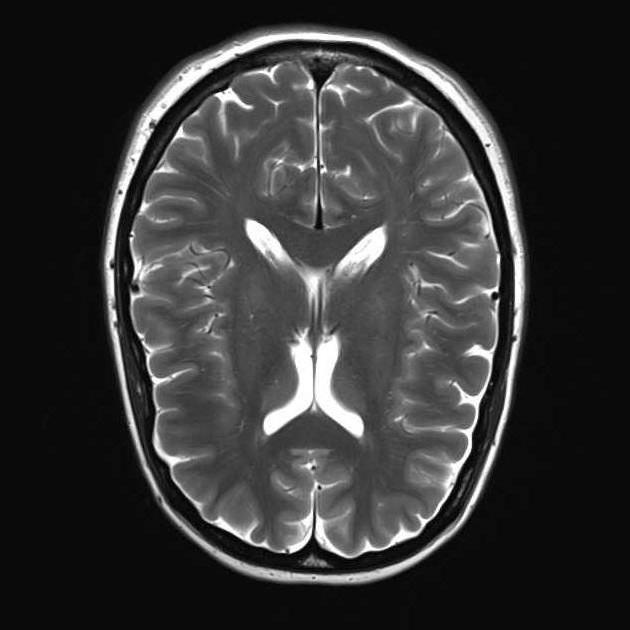

In [ ]:
from PIL import Image
img= Image.open('/content/drive/MyDrive/Deep_Learning/BrainTumor/no/No12.jpg')
img

In [ ]:
import os
import cv2
from skimage.transform import resize

In [ ]:
!mkdir  "/content/drive/MyDrive/Deep_Learning/Reshape"
!mkdir "/content/drive/MyDrive/Deep_Learning/Reshape/No"

In [ ]:
src_dir1 = '/content/drive/MyDrive/Deep_Learning/BrainTumor/no'
dst_dir1 = '/content/drive/MyDrive/Deep_Learning/Reshape/No'

if not os.path.exists(dst_dir1):
    os.makedirs(dst_dir1)

for filename in os.listdir(src_dir1):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Load the image
        image_path = os.path.join(src_dir1, filename)
        image = cv2.imread(image_path)

        # Split the image class based on its filename or any other criterion
        image_class = filename.split('_')[0]  # Example: extracting class from "class1_image123.jpg"

        # Resize the image
        resized_image = cv2.resize(image, (120, 120))  # Specify the desired width and height

        # Save the resized image to the destination directory
        save_path = os.path.join(dst_dir1, f"{image_class}_{filename}")
        cv2.imwrite(save_path, resized_image)

In [ ]:
# !mkdir "/content/drive/MyDrive/Deep_Learning/Reshape/Yes"

In [ ]:
src_dir2 = '/content/drive/MyDrive/Deep_Learning/BrainTumor/yes'
dst_dir2 = '/content/drive/MyDrive/Deep_Learning/Reshape/Yes'

if not os.path.exists(dst_dir2):
    os.makedirs(dst_dir2)

for filename in os.listdir(src_dir2):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Load the image
        image_path = os.path.join(src_dir2, filename)
        image = cv2.imread(image_path)

        # Split the image class based on its filename or any other criterion
        image_class = filename.split('_')[0]  # Example: extracting class from "class1_image123.jpg"

        # Resize the image
        resized_image = cv2.resize(image, (120, 120))  # Specify the desired width and height

        # Save the resized image to the destination directory
        save_path = os.path.join(dst_dir2, f"{image_class}_{filename}")
        cv2.imwrite(save_path, resized_image)

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders

In [ ]:
splitfolders.ratio("/content/drive/MyDrive/Deep_Learning/Reshape",
                   output="/content/drive/MyDrive/Deep_Learning/Splitted",
seed=1337, ratio=(0.6,0.2,0.2), group_prefix=None, move=False)

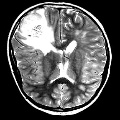

In [ ]:
from PIL import Image
img= Image.open('/content/drive/MyDrive/Deep_Learning/Reshape/Yes/y0.jpg_y0.jpg')
img

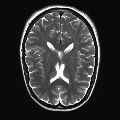

In [ ]:
from PIL import Image
img= Image.open('/content/drive/MyDrive/Deep_Learning/Reshape/No/No12.jpg_No12.jpg')
img

In [ ]:
train_dir= '/content/drive/MyDrive/Deep_Learning/Splitted/train'
test_dir= '/content/drive/MyDrive/Deep_Learning/Splitted/test'
val_dir= '/content/drive/MyDrive/Deep_Learning/Splitted/val'
print("Dataset loaded!!")


Dataset loaded!!


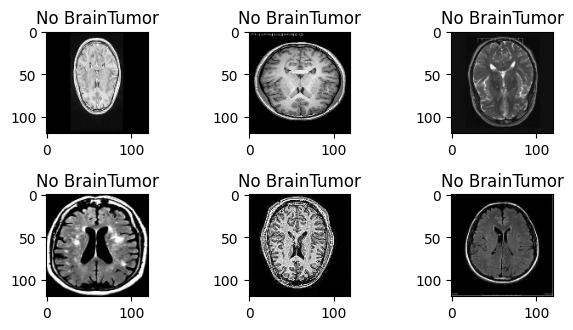

In [ ]:
import matplotlib.image as mpimg
train_dir = "/content/drive/MyDrive/Deep_Learning/Splitted/train/No"
braintumor = os.listdir(train_dir)

# Show the first 6 images
for i in range(6):
    plt.subplot(3, 3, i + 1)
    img = mpimg.imread(os.path.join(train_dir, braintumor[i]))
    plt.title("No BrainTumor")
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()

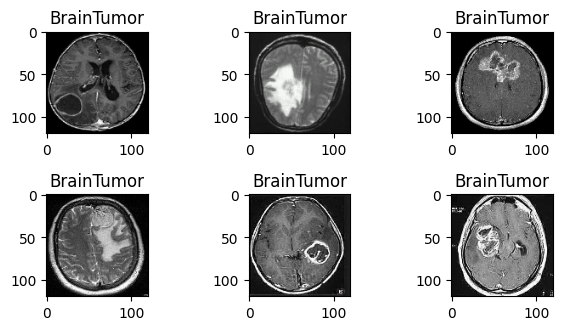

In [ ]:

import matplotlib.image as mpimg
train_dir = "/content/drive/MyDrive/Deep_Learning/Splitted/train/Yes"
braintumor = os.listdir(train_dir)

# Show the first 6 images
for i in range(6):
    plt.subplot(3, 3, i + 1)
    img = mpimg.imread(os.path.join(train_dir, braintumor[i]))
    plt.title("BrainTumor")
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()

In [ ]:
no_tumor = "/content/drive/MyDrive/Deep_Learning/BrainTumor/no"
yes_tumor = "/content/drive/MyDrive/Deep_Learning/BrainTumor/yes"

filepaths = []
labels= []
dict_list = [no_tumor, yes_tumor]
for i, j in enumerate(dict_list):
    flist=os.listdir(j)
    for f in flist:
        fpath=os.path.join(j,f)
        filepaths.append(fpath)
        if i==0:
          labels.append('No Tumor')
        else:
          labels.append('Yes Tumor')

Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
tumor_data = pd.concat([Fseries,Lseries], axis=1)
tumor_df = pd.DataFrame(tumor_data)
print(tumor_df.head())
print(tumor_df["labels"].value_counts())


                                           filepaths    labels
0  /content/drive/MyDrive/Deep_Learning/BrainTumo...  No Tumor
1  /content/drive/MyDrive/Deep_Learning/BrainTumo...  No Tumor
2  /content/drive/MyDrive/Deep_Learning/BrainTumo...  No Tumor
3  /content/drive/MyDrive/Deep_Learning/BrainTumo...  No Tumor
4  /content/drive/MyDrive/Deep_Learning/BrainTumo...  No Tumor
Yes Tumor    1500
No Tumor      996
Name: labels, dtype: int64


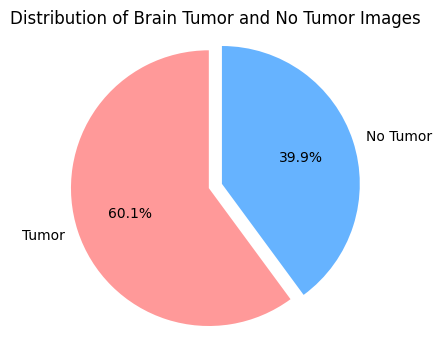

In [ ]:
import matplotlib.pyplot as plt

labels = ['Tumor', 'No Tumor']
sizes = [len(tumor_df[tumor_df['labels'] == 'Yes Tumor']), len(tumor_df[tumor_df['labels'] == 'No Tumor'])]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # explode the first slice

fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Brain Tumor and No Tumor Images')
plt.show()


In [ ]:
!pip install opencv-python-headless
import cv2

In [ ]:

path = '/content/drive/MyDrive/DL/Splitted/train'

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
from PIL import Image

img = Image.open('/content/drive/MyDrive/Deep_Learning/BrainTumor/yes/y0.jpg')
img_array = np.array(img)

In [ ]:
!pip install matplotlib-venn

In [ ]:
from PIL import Image

path = '/content/drive/MyDrive/Deep_Learning/BrainTumor/no/No12.jpg' # replace with the file path of the image

# Load the image and resize it to a fixed size
img = Image.open(path)
img = img.resize((150, 150))

# Convert the image to a numpy array
img_array = np.array(img)

# Normalize the pixel values to the range [0, 1]
img_array = img_array / 255.0

In [ ]:
import os

output_folder = '/content/drive/MyDrive/Deep_Learning/Splitted'

# Get the paths to the train, validation, and test folders
train_folder = os.path.join(output_folder, 'train')
val_folder = os.path.join(output_folder, 'val')
test_folder = os.path.join(output_folder, 'test')

# Function to count images in a folder
def count_images_in_folder(folder):
    subfolders = os.listdir(folder)
    counts = {}
    for subfolder in subfolders:
        subfolder_path = os.path.join(folder, subfolder)
        counts[subfolder] = len(os.listdir(subfolder_path))
    return counts

# Count the number of images in each folder
train_counts = count_images_in_folder(train_folder)
val_counts = count_images_in_folder(val_folder)
test_counts = count_images_in_folder(test_folder)

# Print the image counts for each folder
print("Images in train folder:")
print(train_counts)
print("\nImages in validation folder:")
print(val_counts)
print("\nImages in test folder:")
print(test_counts)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir= '/content/drive/MyDrive/Deep_Learning/Splitted/train'
test_dir= '/content/drive/MyDrive/Deep_Learning/Splitted/test'
val_dir= '/content/drive/MyDrive/Deep_Learning/Splitted/val'

# Define data augmentation and normalization for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Normalize validation and test data without augmentation
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define batch size
batch_size = 32

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(244, 244),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(244,244),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(244,244),
    batch_size=batch_size,
    class_mode='binary'
)

Found 1696 images belonging to 2 classes.
Found 637 images belonging to 2 classes.
Found 656 images belonging to 2 classes.


# **Sequential Model**

In [ ]:
from tensorflow.keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Defining Sequential Model
model = Sequential()

# Defining conv-pool layers
model.add(Conv2D(filters=32, kernel_size=(2, 2), strides=(1, 1), activation="relu", padding="valid", input_shape=(244, 244, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding more conv-pool layers
model.add(Conv2D(filters=64, kernel_size=(2, 2), strides=(1, 1), activation="relu", padding="valid"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(2, 2), strides=(1, 1), activation="relu", padding="valid"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding flatten layer
model.add(Flatten())

# Adding dense layers with dropout
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.4))

model.add(Dense(128, activation="relu"))
model.add(Dropout(rate=0.4))

model.add(Dense(64, activation="relu"))

# Output layer
model.add(Dense(1, activation="sigmoid"))  # Sigmoid is used for binary classification

# Model compilation
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 243, 243, 32)      416       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 121, 121, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 120, 120, 64)      8256      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 60, 60, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 59, 59, 128)       32896     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 29, 29, 128)     

In [ ]:
# Define early stopping callback
#early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(train_generator, epochs=30, validation_data=val_generator)#, callbacks=[early_stopping])



Epoch 1/30
53/53 [==============================] - 132s 2s/step - loss: 0.6759 - accuracy: 0.6445 - val_loss: 0.5603 - val_accuracy: 0.6876
Epoch 2/30
53/53 [==============================] - 128s 2s/step - loss: 0.6034 - accuracy: 0.6710 - val_loss: 0.5434 - val_accuracy: 0.8022
Epoch 3/30
53/53 [==============================] - 128s 2s/step - loss: 0.5708 - accuracy: 0.7140 - val_loss: 0.5644 - val_accuracy: 0.7378
Epoch 4/30
53/53 [==============================] - 125s 2s/step - loss: 0.5388 - accuracy: 0.7341 - val_loss: 0.4940 - val_accuracy: 0.7708
Epoch 5/30
53/53 [==============================] - 128s 2s/step - loss: 0.5447 - accuracy: 0.7394 - val_loss: 0.3865 - val_accuracy: 0.8242
Epoch 6/30
53/53 [==============================] - 137s 3s/step - loss: 0.5192 - accuracy: 0.7535 - val_loss: 0.4283 - val_accuracy: 0.8132
Epoch 7/30
53/53 [==============================] - 127s 2s/step - loss: 0.5122 - accuracy: 0.7583 - val_loss: 0.4576 - val_accuracy: 0.7959
Epoch 8/30
53

In [ ]:
# Get training and validation loss histories
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Get training and validation accuracy histories
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Print training and validation loss and accuracy
print('Training Loss:', training_loss)
print('Validation Loss:', validation_loss)
print('Training Accuracy:', training_accuracy)
print('Validation Accuracy:', validation_accuracy)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

Training Loss: [0.675883948802948, 0.603369414806366, 0.5708197951316833, 0.5387570261955261, 0.5446979403495789, 0.5192183256149292, 0.5121679306030273, 0.5101587772369385, 0.5079516172409058, 0.49710842967033386, 0.48218363523483276, 0.48822328448295593, 0.48976609110832214, 0.4820724427700043, 0.4885561466217041, 0.4657640755176544, 0.4712214171886444, 0.46243223547935486, 0.45261794328689575, 0.4941709339618683, 0.46060165762901306, 0.45997583866119385, 0.47426220774650574, 0.45866313576698303, 0.4571930170059204, 0.46531710028648376, 0.4505051374435425, 0.44742757081985474, 0.43055158853530884, 0.43776533007621765]
Validation Loss: [0.5602812170982361, 0.5434151887893677, 0.5644041895866394, 0.49403393268585205, 0.38647857308387756, 0.4282548129558563, 0.457617849111557, 0.4066888391971588, 0.4131896495819092, 0.41488152742385864, 0.3792093098163605, 0.38583630323410034, 0.3611333668231964, 0.37759214639663696, 0.37098973989486694, 0.4254312217235565, 0.3786342144012451, 0.3646186

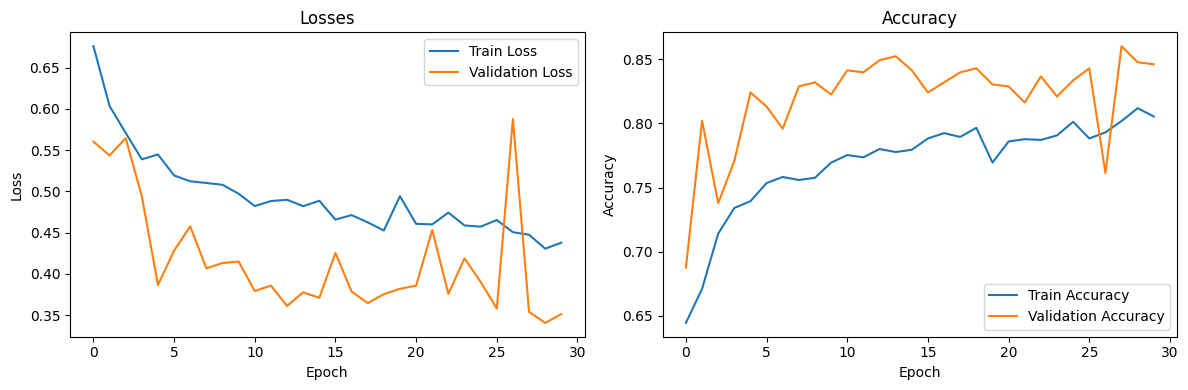

21/21 [==============================] - 12s 556ms/step - loss: 0.3565 - accuracy: 0.8506
Test Loss: 0.35651424527168274
Test Accuracy: 0.8506097793579102


In [ ]:
import matplotlib.pyplot as plt

# Plot the loss curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

In [ ]:
pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Get the model's prediction on the test data
predictions = model.predict(test_generator)
# Convert predictions to binary class values
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Get the true class labels
true_labels = test_generator.classes

# Calculate accuracy
accuracy = accuracy_score(true_labels, binary_predictions)

# Calculate precision
precision = precision_score(true_labels, binary_predictions)

# Calculate recall
recall = recall_score(true_labels, binary_predictions)

# Calculate F1 score
f1 = f1_score(true_labels, binary_predictions)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

21/21 [==============================] - 18s 877ms/step
Accuracy:  0.5975609756097561
Precision:  0.6959183673469388
Recall:  0.7478070175438597
F1 Score:  0.7209302325581396


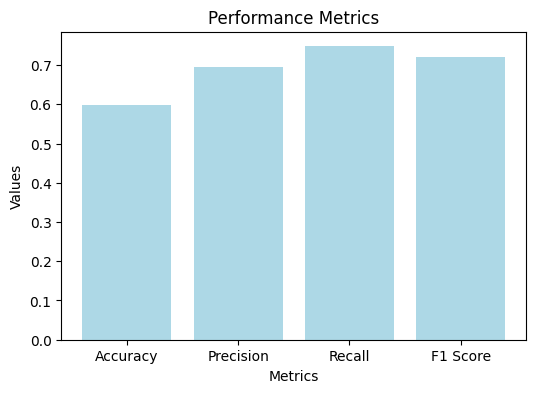

In [ ]:
import matplotlib.pyplot as plt

# Metrics values
metrics_values = [accuracy, precision, recall, f1]

# Metrics names
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(metrics_names, metrics_values, color='lightblue')
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("Performance Metrics")

# Display the plot
plt.show()

In [ ]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


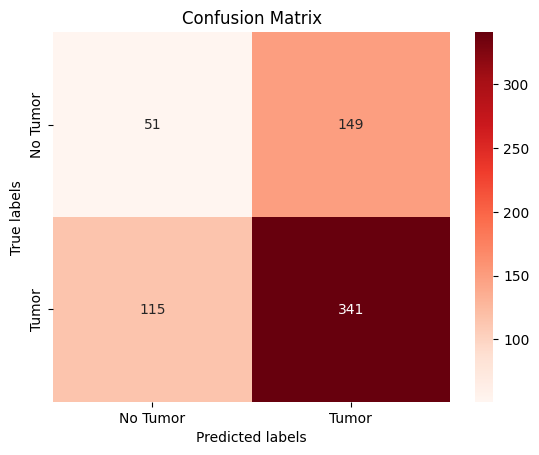

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(true_labels, binary_predictions)

# Define figure and axes
fig, ax = plt.subplots()

# Create a heatmap of the confusion matrix with labels
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Reds')

# Add labels to the plot
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Add tick labels
ax.xaxis.set_ticklabels(['No Tumor', 'Tumor'])
ax.yaxis.set_ticklabels(['No Tumor', 'Tumor'])

plt.show()

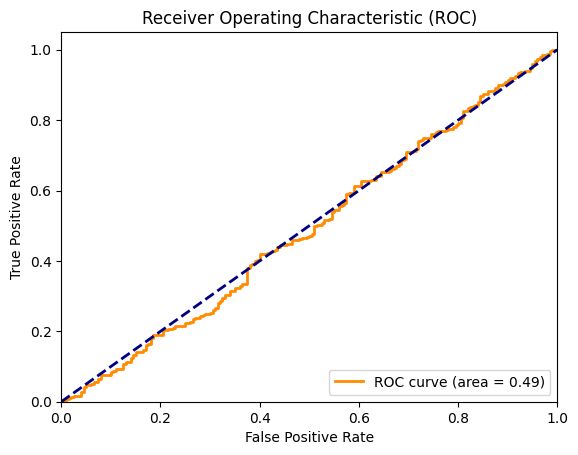

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute the ROC curve points
fpr, tpr, thresholds = roc_curve(true_labels, predictions)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# **ResNet50**

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout
# Load the pre-trained ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(244, 244, 3))

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add your own classification layers on top of the pre-trained model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


94765736/94765736 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 244, 244, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 250, 250, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 122, 122, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                             

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
#early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


# Train the model
ResNet_history = model.fit(train_generator, epochs=30, validation_data=val_generator)#, callbacks=[early_stopping])


Epoch 1/30
53/53 [==============================] - 414s 8s/step - loss: 0.6672 - accuracy: 0.6315 - val_loss: 0.5863 - val_accuracy: 0.6876
Epoch 2/30
53/53 [==============================] - 410s 8s/step - loss: 0.6320 - accuracy: 0.6468 - val_loss: 0.5665 - val_accuracy: 0.6876
Epoch 3/30
53/53 [==============================] - 410s 8s/step - loss: 0.6294 - accuracy: 0.6450 - val_loss: 0.5491 - val_accuracy: 0.6876
Epoch 4/30
53/53 [==============================] - 411s 8s/step - loss: 0.6166 - accuracy: 0.6562 - val_loss: 0.5485 - val_accuracy: 0.6892
Epoch 5/30
53/53 [==============================] - 410s 8s/step - loss: 0.6203 - accuracy: 0.6533 - val_loss: 0.5521 - val_accuracy: 0.6876
Epoch 6/30
53/53 [==============================] - 410s 8s/step - loss: 0.6255 - accuracy: 0.6504 - val_loss: 0.5352 - val_accuracy: 0.7378
Epoch 7/30
53/53 [==============================] - 362s 7s/step - loss: 0.6186 - accuracy: 0.6680 - val_loss: 0.5388 - val_accuracy: 0.7284
Epoch 8/30
53

In [ ]:


# Get training and validation loss histories
training_loss_1= ResNet_history.history['loss']
validation_loss_1 = ResNet_history.history['val_loss']

# Get training and validation accuracy histories
training_accuracy_1 = ResNet_history.history['accuracy']
validation_accuracy_1 = ResNet_history.history['val_accuracy']

# Print training and validation loss and accuracy
print('Training Loss:', training_loss_1)
print('Validation Loss:', validation_loss_1)
print('Training Accuracy:', training_accuracy_1)
print('Validation Accuracy:', validation_accuracy_1)

# Evaluate the model on the test data
test_loss_1, test_acc_1 = model.evaluate(test_generator)
print('Test Loss:', test_loss_1)
print('Test Accuracy:', test_acc_1)

Training Loss: [0.6672123670578003, 0.6320074796676636, 0.6294466853141785, 0.6165878772735596, 0.6202791333198547, 0.6254852414131165, 0.6186328530311584, 0.6193403601646423, 0.6161230802536011, 0.6154265999794006, 0.6103124022483826, 0.6070425510406494, 0.6113315224647522, 0.6103144288063049, 0.6023643612861633, 0.6018804907798767, 0.5970402359962463, 0.5979964137077332, 0.6143229007720947, 0.6050488948822021, 0.6013044714927673, 0.6019876003265381, 0.6095992922782898, 0.6062673330307007, 0.6078056693077087, 0.5877827405929565, 0.5946357250213623, 0.5946477651596069, 0.6108492612838745, 0.6185275912284851]
Validation Loss: [0.5862641334533691, 0.5664674639701843, 0.5491452813148499, 0.5485334396362305, 0.5520786046981812, 0.5351889133453369, 0.5388109087944031, 0.5560216307640076, 0.5381519794464111, 0.5313407778739929, 0.5490714311599731, 0.5429171323776245, 0.5299521684646606, 0.5312148332595825, 0.5323240756988525, 0.515334963798523, 0.5484744906425476, 0.5299568176269531, 0.53437

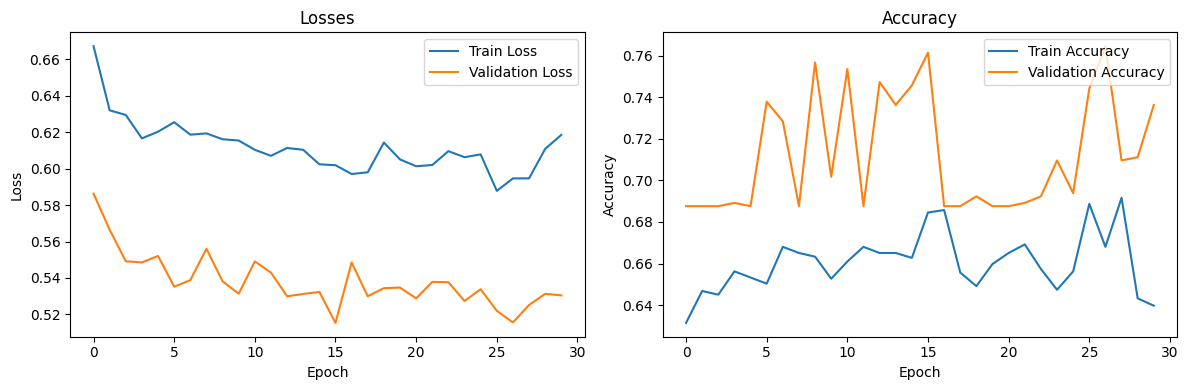

21/21 [==============================] - 102s 5s/step - loss: 0.5174 - accuracy: 0.7454
Test Loss: 0.5173614621162415
Test Accuracy: 0.7454268336296082


In [ ]:
import matplotlib.pyplot as plt

# Plot the loss curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(ResNet_history.history['loss'], label='Train Loss')
plt.plot(ResNet_history.history['val_loss'], label='Validation Loss')
plt.title('Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(ResNet_history.history['accuracy'], label='Train Accuracy')
plt.plot(ResNet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Get the model's prediction on the test data
predictions_1 = model.predict(test_generator)

# Convert predictions to binary class values
binary_predictions_1 = [1 if pred > 0.5 else 0 for pred in predictions_1]

# Get the true class labels
true_labels_1 = test_generator.classes

# Calculate accuracy
accuracy_1 = accuracy_score(true_labels, binary_predictions)

# Calculate precision
precision_1 = precision_score(true_labels, binary_predictions)

# Calculate recall
recall_1 = recall_score(true_labels, binary_predictions)

# Calculate F1 score
f1 = f1_score(true_labels, binary_predictions)

print("Accuracy: ", accuracy_1)
print("Precision: ", precision_1)
print("Recall: ", recall_1)
print("F1 Score: ", f1)

21/21 [==============================] - 105s 5s/step
Accuracy:  0.5975609756097561
Precision:  0.6959183673469388
Recall:  0.7478070175438597
F1 Score:  0.7209302325581396


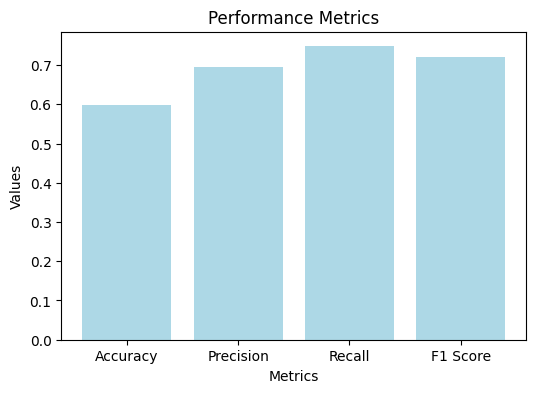

In [ ]:
import matplotlib.pyplot as plt

# Metrics values
metrics_values = [accuracy_1, precision_1, recall_1, f1]

# Metrics names
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(metrics_names, metrics_values, color='lightblue')
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("Performance Metrics")

# Display the plot
plt.show()

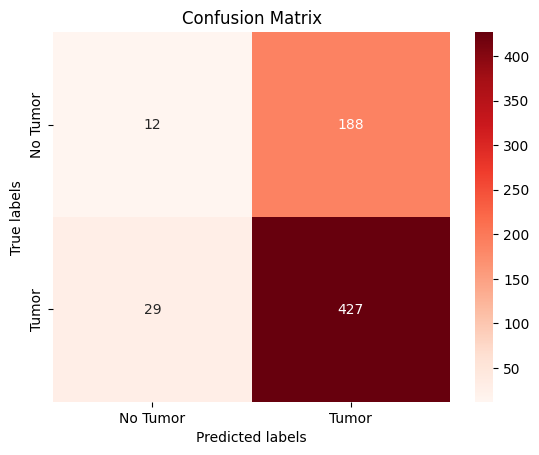

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(true_labels_1, binary_predictions_1)

# Define figure and axes
fig, ax = plt.subplots()

# Create a heatmap of the confusion matrix with labels
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Reds')

# Add labels to the plot
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Add tick labels
ax.xaxis.set_ticklabels(['No Tumor', 'Tumor'])
ax.yaxis.set_ticklabels(['No Tumor', 'Tumor'])

plt.show()

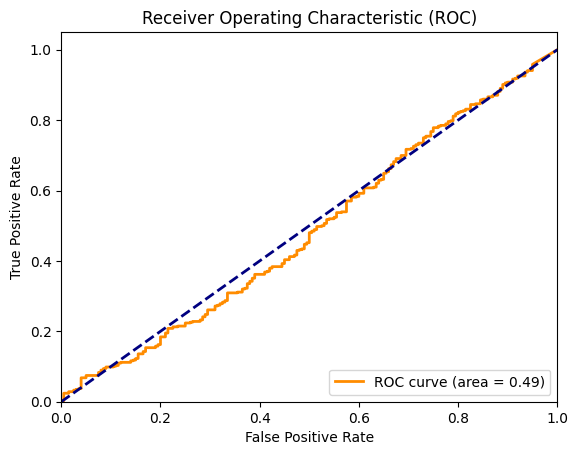

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute the ROC curve points
fpr, tpr, thresholds = roc_curve(true_labels_1, predictions_1)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Comparison between two model's accuracy:

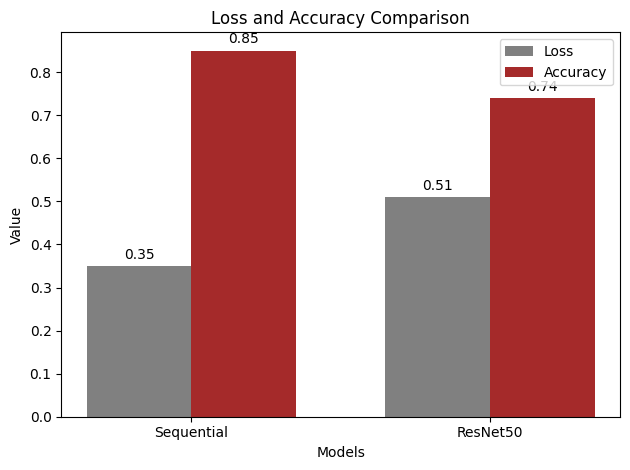

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Loss and accuracy values for each model (example data)
models = ['Sequential', 'ResNet50']
loss_values = [0.35, 0.51] # Example loss values
accuracy_values = [0.85, 0.74] # Example accuracy values

# Setting the positions of the bars
bar_width = 0.35
index = np.arange(len(models))

# Plotting the bar plots for loss and accuracy
fig, ax = plt.subplots()
loss_bars = ax.bar(index, loss_values, bar_width, label='Loss', color='Grey') # Set the color for loss bars
accuracy_bars = ax.bar(index + bar_width, accuracy_values, bar_width, label='Accuracy', color='Brown') # Set the color for accuracy bars

# Adding labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Value')
ax.set_title('Loss and Accuracy Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

# Function to add value labels on top of each bar
def add_labels(bars):
  for bar in bars:
       height = bar.get_height()
       ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Adding value labels on top of each bar
add_labels(loss_bars)
add_labels(accuracy_bars)

# Displaying the plot
plt.tight_layout()
plt.show()
